# 4 Game of Thrones - Inceleme

[Google'da karakter aramalari](https://trends.google.com.tr/trends/explore?date=today%205-y&q=Eddard%20Stark,%2Fm%2F02yxj7t,%2Fm%2F02ntqy8,%2Fm%2F02ntqy0)


5 adet kitabin verisine [adresinden](https://github.com/mathbeveridge/asoiaf/tree/master/data) ulasilabilir.

> This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
kitap1 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv')
kitap2 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book2-edges.csv')
kitap3 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book3-edges.csv')
kitap4 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book4-edges.csv')
kitap5 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book5-edges.csv')

In [3]:
kitap1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [4]:
kitap1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
Source    684 non-null object
Target    684 non-null object
Type      684 non-null object
weight    684 non-null int64
book      684 non-null int64
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [5]:
len(kitap1)

684

In [6]:
kitap1.Source[0:3]

0       Addam-Marbrand
1       Addam-Marbrand
2    Aegon-I-Targaryen
Name: Source, dtype: object

In [7]:
G1 = nx.Graph(name='Kitap 1') 
for i in range(len(kitap1)):
    G1.add_edge(kitap1.Source[i], kitap1.Target[i],  weight= kitap1.weight[i])

Text(0.5,1,'Kitap 1 - Game of Thrones')

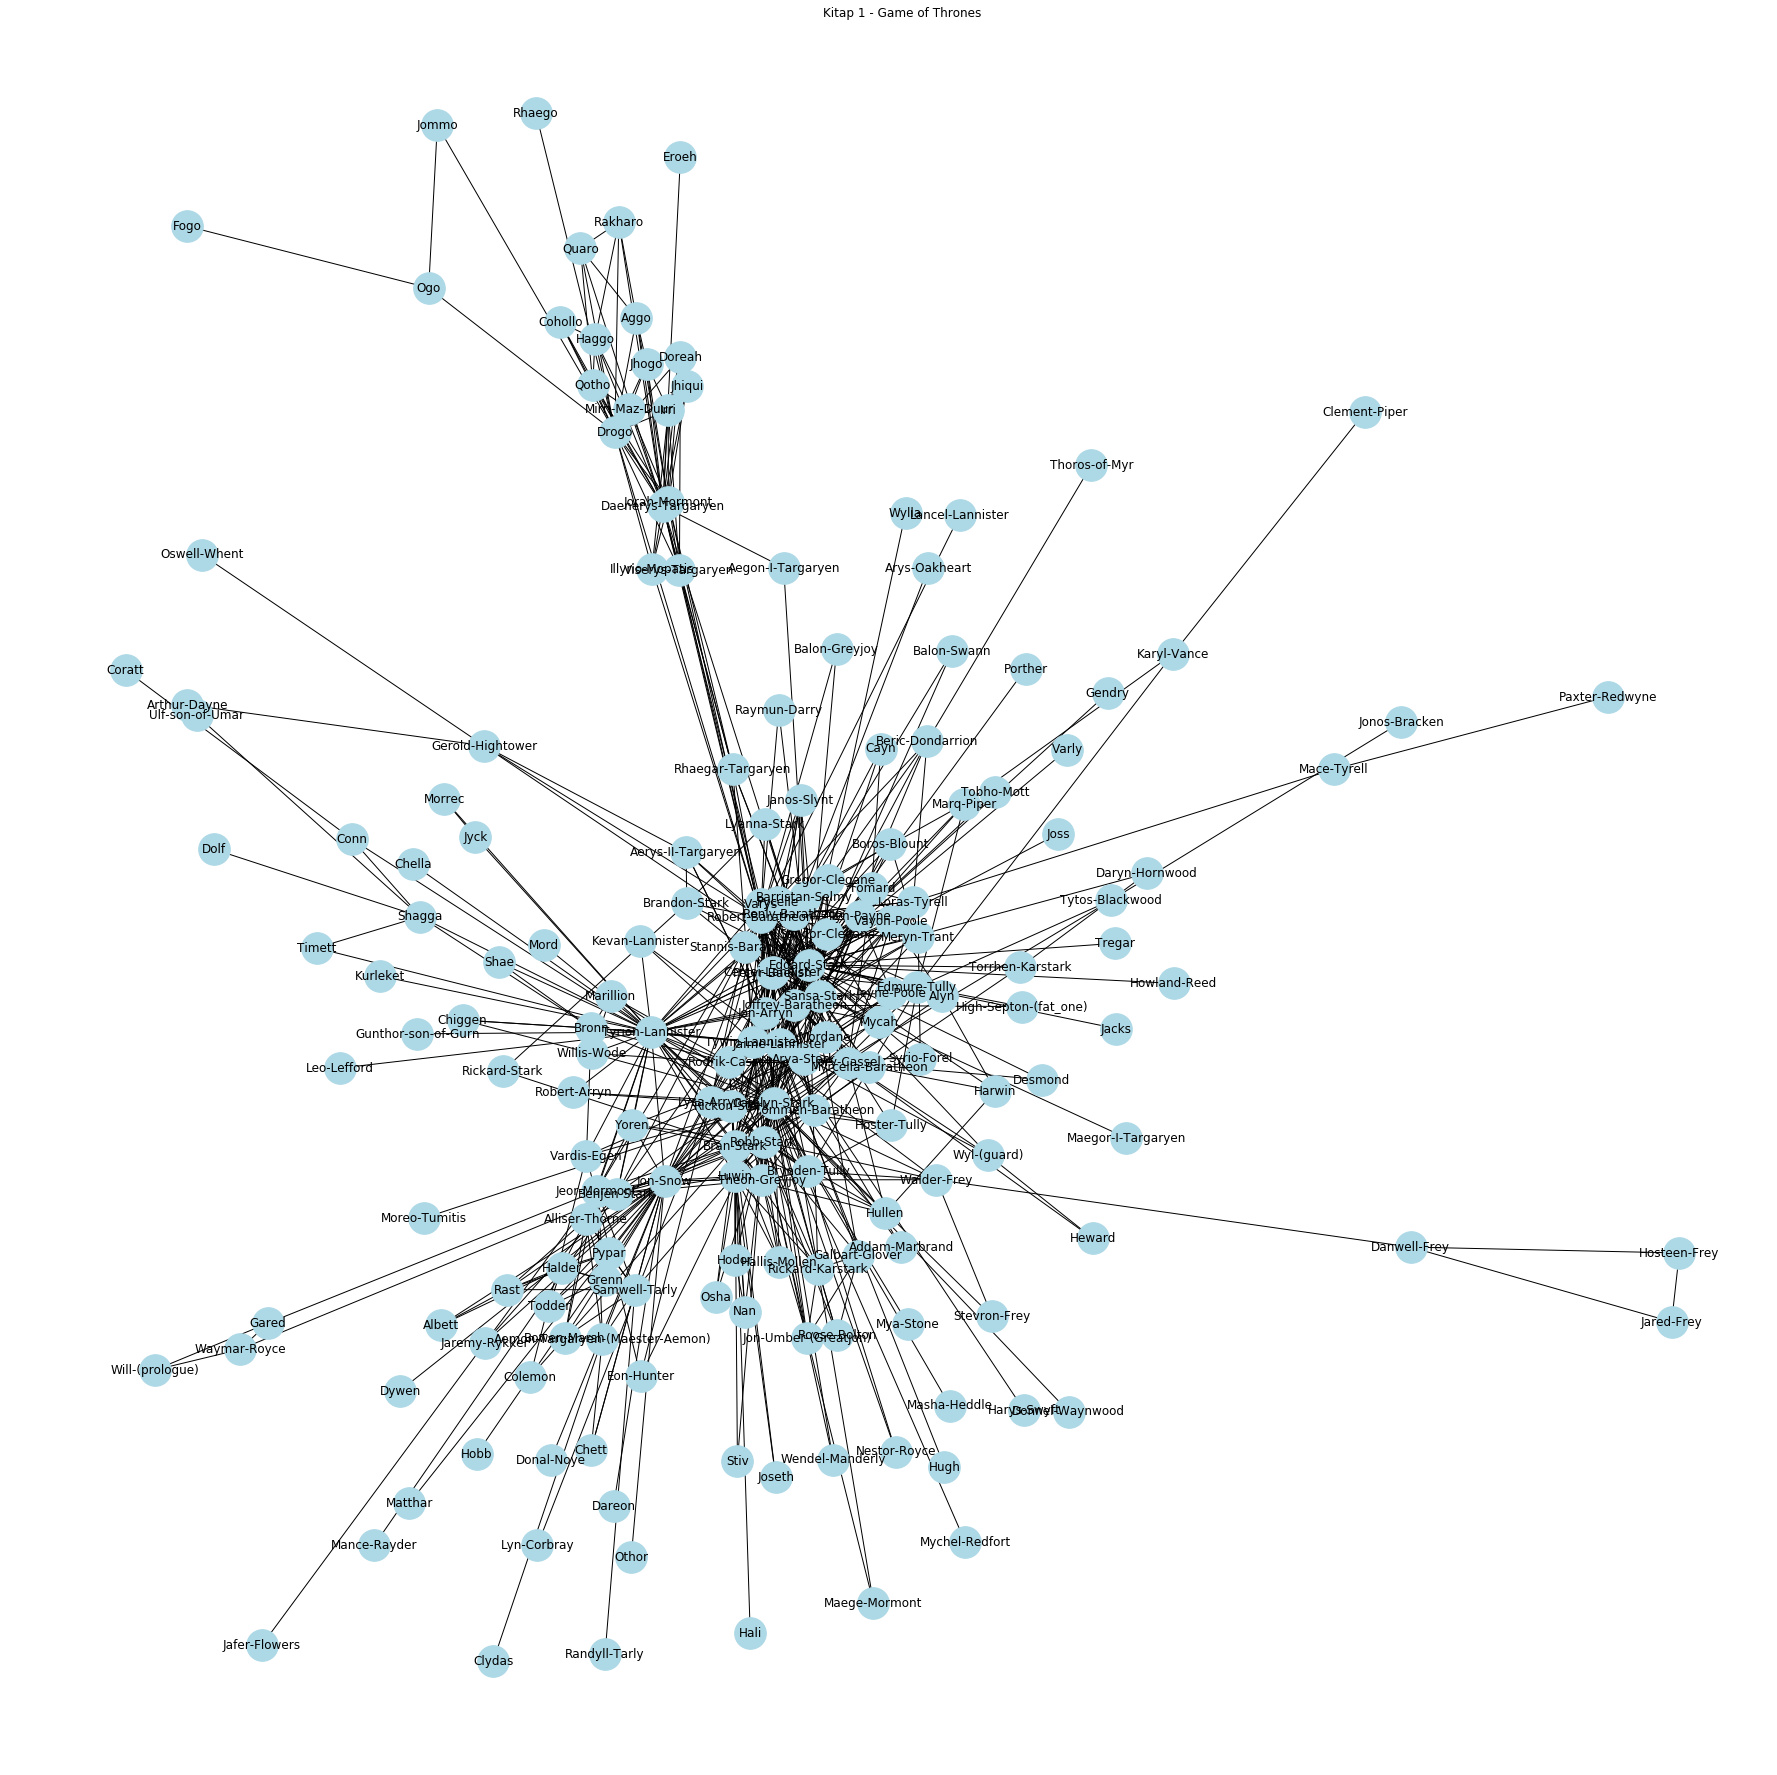

In [8]:
plt.figure(figsize=(24, 24))
pos2=nx.spring_layout(G1,scale=1) 
nx.draw(G1, pos=pos2, node_size=1000, node_color='lightblue', with_labels=True)
plt.title("Kitap 1 - Game of Thrones")

In [9]:
sorted(nx.degree_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

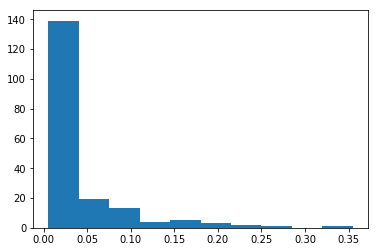

In [10]:
plt.hist(list(nx.degree_centrality(G1).values()))
plt.show()

In [11]:
sorted(nx.pagerank_numpy(G1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.04552079222830664),
 ('Tyrion-Lannister', 0.03301362462493269),
 ('Catelyn-Stark', 0.030193105286631914),
 ('Robert-Baratheon', 0.029834742227736695),
 ('Jon-Snow', 0.02683449952206629),
 ('Robb-Stark', 0.02156294129724754),
 ('Sansa-Stark', 0.020008034042864633),
 ('Bran-Stark', 0.019945786786238352),
 ('Jaime-Lannister', 0.01750784720284688),
 ('Cersei-Lannister', 0.017082604584758066)]

In [12]:
sorted(nx.pagerank_numpy(G1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.07239401100498274),
 ('Robert-Baratheon', 0.048517275705099575),
 ('Jon-Snow', 0.04770689062474903),
 ('Tyrion-Lannister', 0.04367437892706297),
 ('Catelyn-Stark', 0.03466703470130745),
 ('Bran-Stark', 0.0297742005398002),
 ('Robb-Stark', 0.02921618364519686),
 ('Daenerys-Targaryen', 0.02708962251302111),
 ('Sansa-Stark', 0.026961778915683167),
 ('Cersei-Lannister', 0.021631679397419005)]

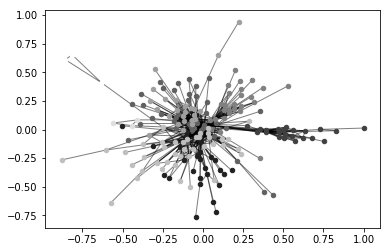

In [13]:
#first compute the best partition
partition = community.best_partition(G1)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G1)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G1,pos, alpha=0.5)
plt.show()

## Calismazsa: pip3 install networkx --upgrade ve pip3 install python-louvain --upgrade.

Text(0.5,1,'Kitap 1 - Game of Thrones')

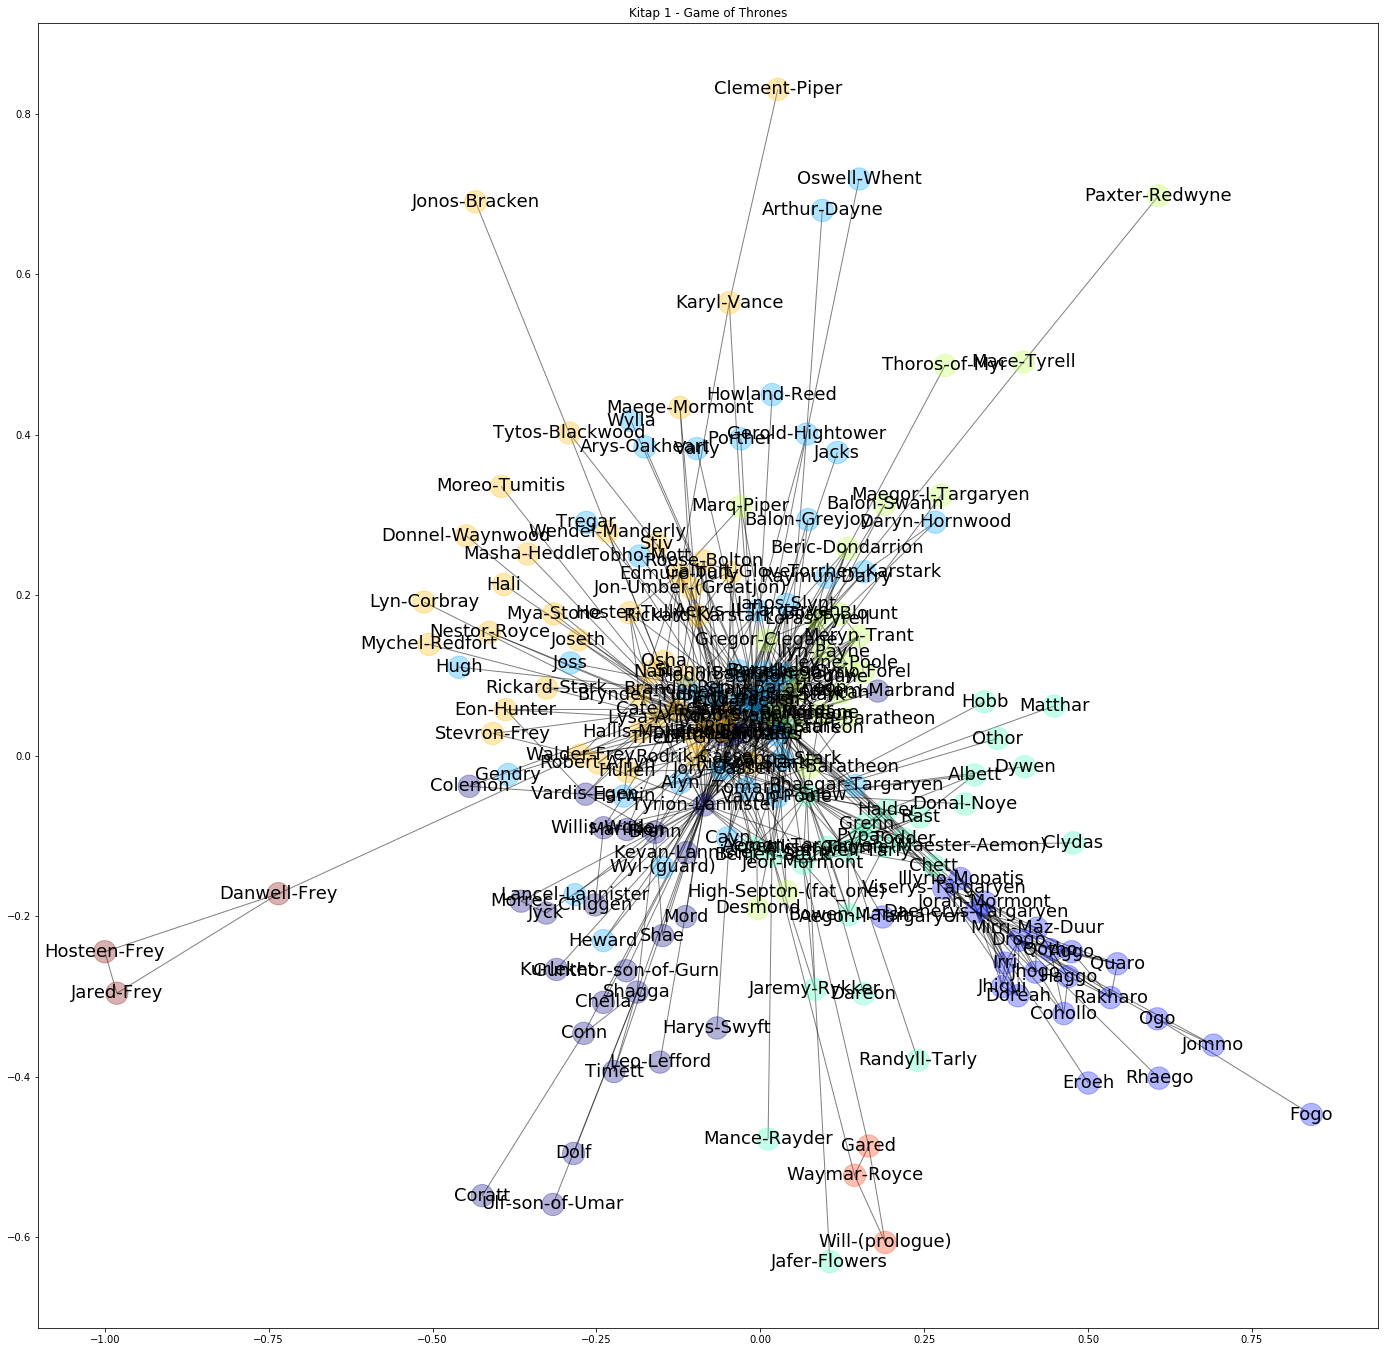

In [14]:
if partition is not None:
        values = [partition.get(node) for node in G1.nodes()]

plt.figure(figsize=(24, 24))
pos2=nx.spring_layout(G1,scale=1) 
nx.draw_networkx_nodes(G1,pos2,node_size=500,node_color=values, alpha=0.3,cmap = plt.get_cmap('jet'))
nx.draw_networkx_edges(G1,pos2,width=1,alpha=0.5)
nx.draw_networkx_labels(G1,pos2,font_size=18)

plt.title("Kitap 1 - Game of Thrones")



In [15]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G1))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G1)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G1.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

True
Network diameter of largest component: 7


## Kendi Community Detection Algoritmamiz


In [16]:
length, path = nx.single_source_dijkstra(G1, 'Eddard-Stark')
length, path

({'Addam-Marbrand': 9,
  'Aegon-I-Targaryen': 4,
  'Aemon-Targaryen-(Maester-Aemon)': 17,
  'Aerys-II-Targaryen': 6,
  'Aggo': 13,
  'Albett': 15,
  'Alliser-Thorne': 15,
  'Alyn': 11,
  'Arthur-Dayne': 7,
  'Arya-Stark': 7,
  'Arys-Oakheart': 11,
  'Balon-Greyjoy': 3,
  'Balon-Swann': 11,
  'Barristan-Selmy': 10,
  'Benjen-Stark': 9,
  'Beric-Dondarrion': 3,
  'Boros-Blount': 11,
  'Bowen-Marsh': 15,
  'Bran-Stark': 8,
  'Brandon-Stark': 10,
  'Bronn': 10,
  'Brynden-Tully': 6,
  'Catelyn-Stark': 7,
  'Cayn': 7,
  'Cersei-Lannister': 8,
  'Chella': 13,
  'Chett': 14,
  'Chiggen': 13,
  'Clement-Piper': 10,
  'Clydas': 22,
  'Cohollo': 12,
  'Colemon': 10,
  'Conn': 14,
  'Coratt': 19,
  'Daenerys-Targaryen': 5,
  'Danwell-Frey': 12,
  'Dareon': 16,
  'Daryn-Hornwood': 3,
  'Desmond': 4,
  'Dolf': 20,
  'Donal-Noye': 17,
  'Donnel-Waynwood': 10,
  'Doreah': 13,
  'Drogo': 10,
  'Dywen': 14,
  'Eddard-Stark': 0,
  'Edmure-Tully': 3,
  'Eon-Hunter': 10,
  'Eroeh': 10,
  'Fogo': 20,
  'Ga

In [17]:
length['Jon-Snow'], path['Jon-Snow']

(10, ['Eddard-Stark', 'Rodrik-Cassel', 'Jon-Snow'])

In [18]:
G1['Eddard-Stark']['Jon-Snow']

{'weight': 38}

In [19]:
G1['Eddard-Stark']['Rodrik-Cassel'], G1['Rodrik-Cassel']['Jon-Snow']

({'weight': 7}, {'weight': 3})

In [20]:
length['Robert-Baratheon'], path['Robert-Baratheon']

(7, ['Eddard-Stark', 'Balon-Greyjoy', 'Robert-Baratheon'])

In [21]:
yuksekler = sorted(nx.edge_betweenness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]
yuksekler

[(('Robert-Baratheon', 'Drogo'), 0.06511341526150327),
 (('Daenerys-Targaryen', 'Eddard-Stark'), 0.05119504936228878),
 (('Eddard-Stark', 'Jon-Snow'), 0.036807751753701164),
 (('Walder-Frey', 'Danwell-Frey'), 0.03174055545972054),
 (('Eddard-Stark', 'Tyrion-Lannister'), 0.031239861844768377),
 (('Jon-Snow', 'Robert-Baratheon'), 0.02960628095173083),
 (('Tyrion-Lannister', 'Shagga'), 0.02858875402863673),
 (('Daenerys-Targaryen', 'Robert-Baratheon'), 0.028067242464079788),
 (('Robert-Baratheon', 'Tyrion-Lannister'), 0.02668635517231797),
 (('Robert-Baratheon', 'Catelyn-Stark'), 0.023469615645975484)]

In [22]:
bag, deger = yuksekler[1]
bag

('Daenerys-Targaryen', 'Eddard-Stark')

In [23]:
for bag, deger in yuksekler:
    n1, n2 = bag
    print(n1, "-->>", n2)

Robert-Baratheon -->> Drogo
Daenerys-Targaryen -->> Eddard-Stark
Eddard-Stark -->> Jon-Snow
Walder-Frey -->> Danwell-Frey
Eddard-Stark -->> Tyrion-Lannister
Jon-Snow -->> Robert-Baratheon
Tyrion-Lannister -->> Shagga
Daenerys-Targaryen -->> Robert-Baratheon
Robert-Baratheon -->> Tyrion-Lannister
Robert-Baratheon -->> Catelyn-Stark


In [24]:
yuksekler = sorted(nx.edge_betweenness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:50]
yuksekler
for bag, deger in yuksekler:
    n1, n2 = bag
    G1.remove_edge(n1, n2)

Text(0.5,1,'Kitap 1 - Game of Thrones')

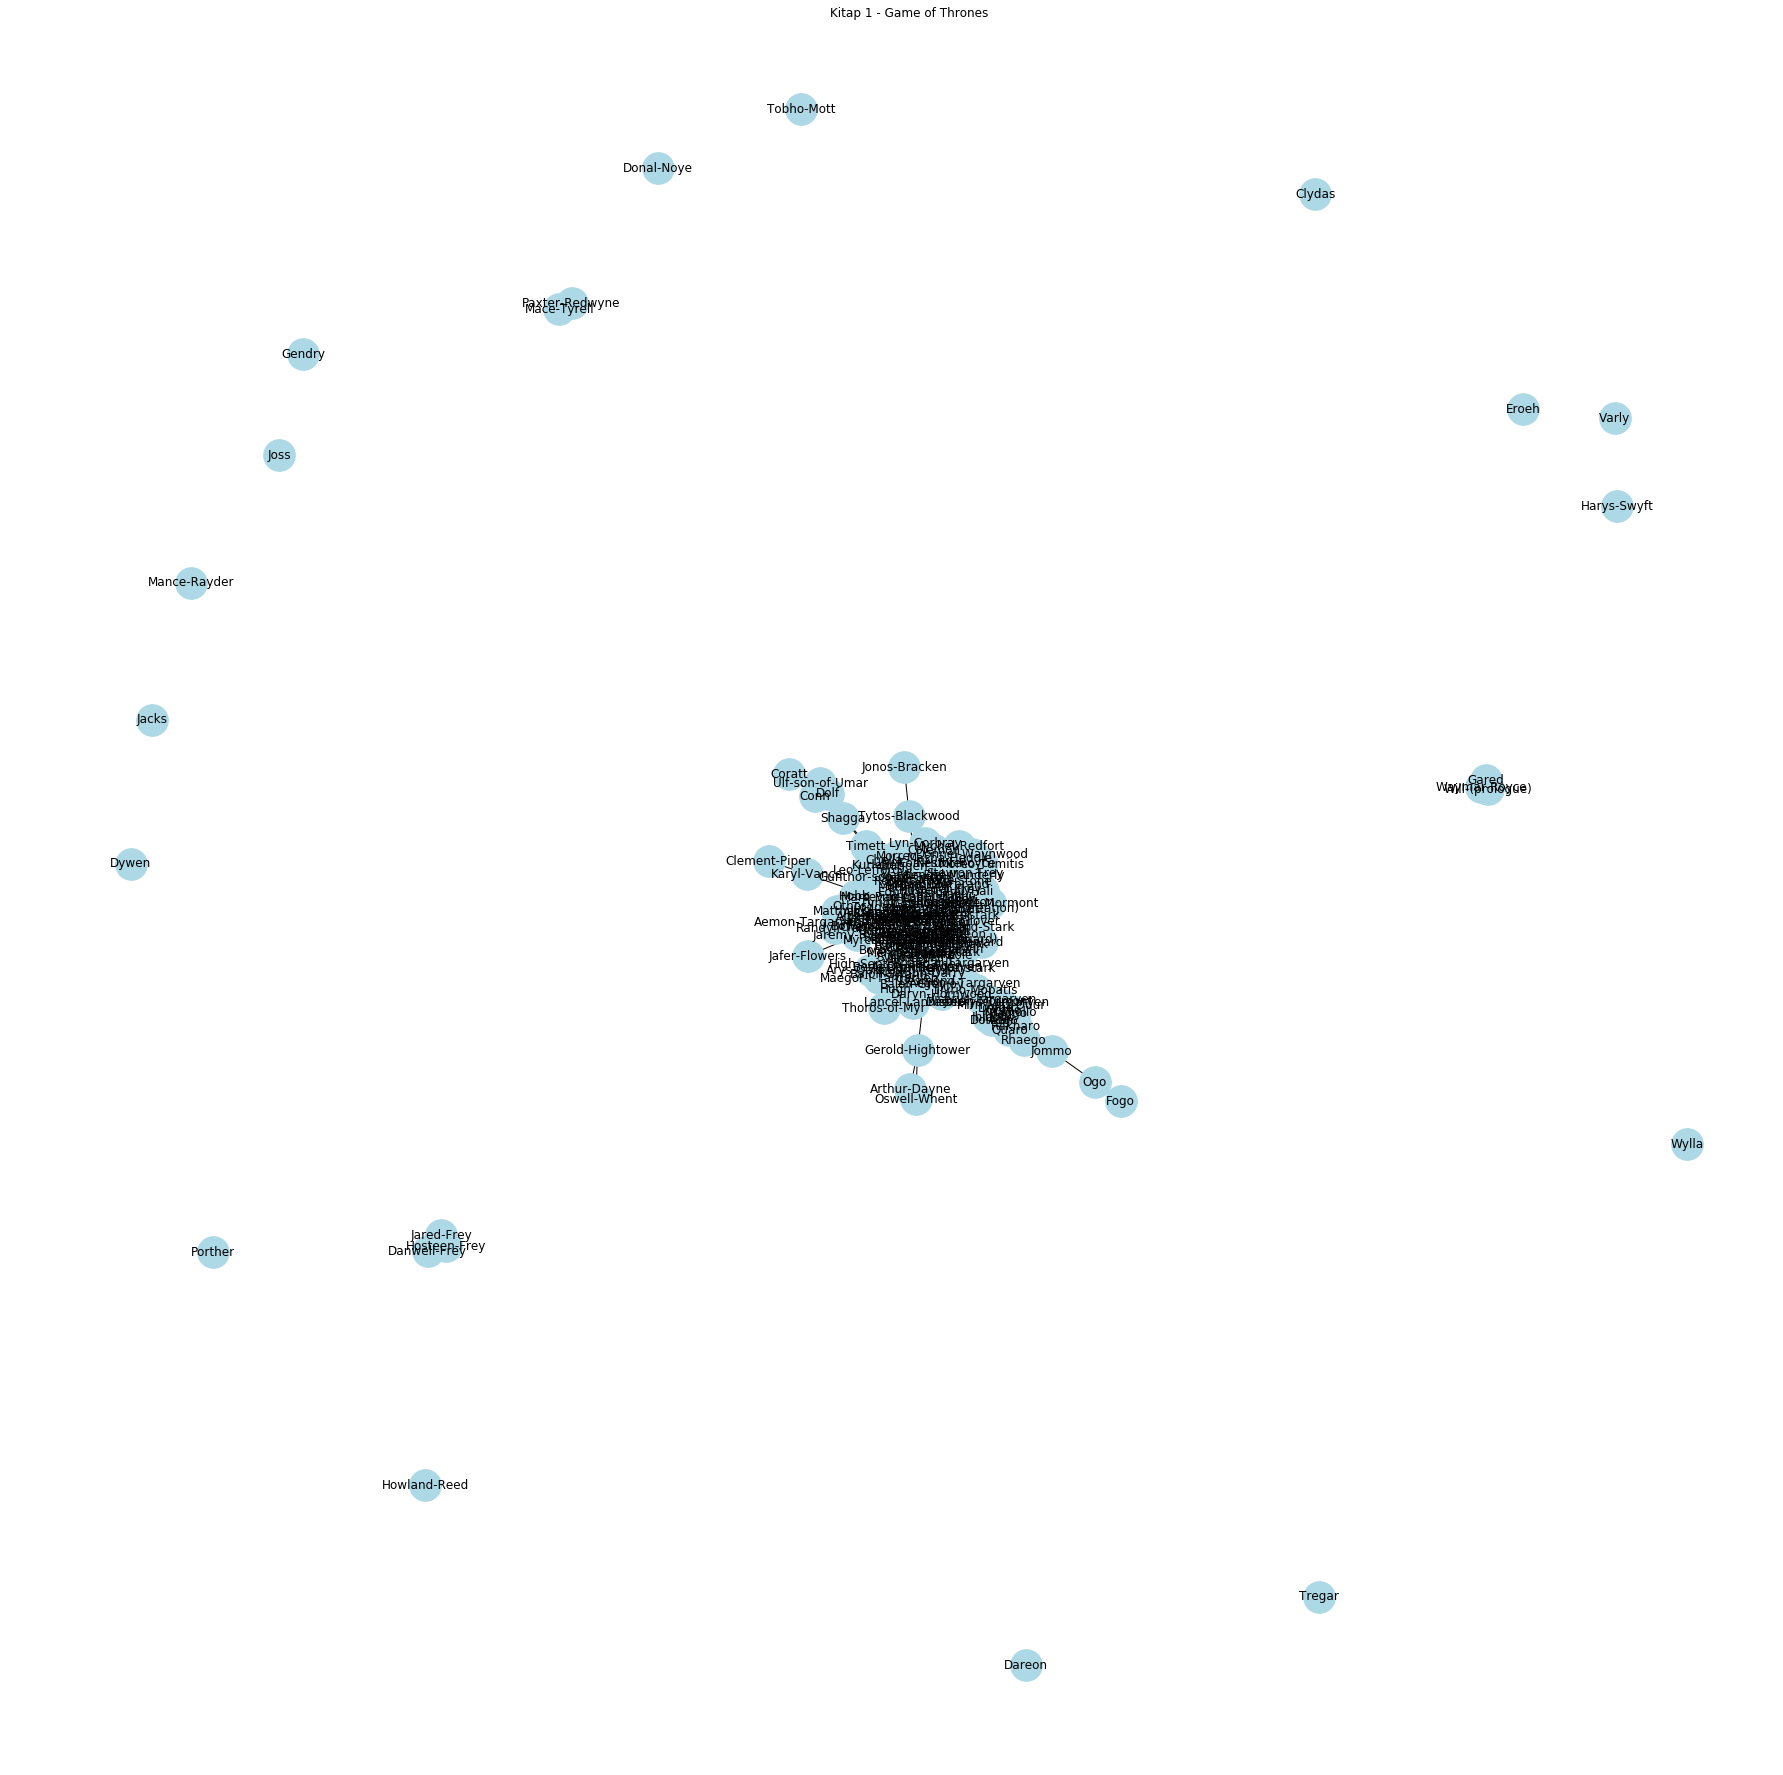

In [25]:
plt.figure(figsize=(24, 24))
pos2=nx.spring_layout(G1,scale=1) 
nx.draw(G1, pos=pos2, node_size=1000, node_color='lightblue', with_labels=True)
plt.title("Kitap 1 - Game of Thrones")

## Harry Potter Incelemesi icin
 - https://github.com/cindyzhong/trt_data_lit_grp_python/blob/master/Lesson3/social_network_analysis_harry_potter.ipynb


## R ile Ag Bilimi
 - http://inet-tr.org.tr/inetconf19/sunum/16.pdf